In [0]:
#Loading Essential libraries:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


**NEURAL NETWORK**
INTRODUCTION                                                                  
Neural network is more widely used , in which data flows in multiple directions. Neural networks has greater ability and are used widely for complex tasks. Neural network contains three layer, 

*   Input layer: It is used to provide the input data or features to the network.
*  output layer: In this layer the activation function is used for different problems. For a binary classification problem, we want the output to be either 0 or 1. Thus, a sigmoid activation function is used. This layer gives out predictions.
*  Hidden layer: A feedforward network applies a series of functions to the input. By having multiple hidden layers, we can compute complex functions by cascading simpler functions. 


The given dataset is circles.csv that contains 'X0' , 'X1' and class. Scatterplot for the respective dataset is created. 

The objective is to determine the accuracy of the given dataset using Neural network algorithm.





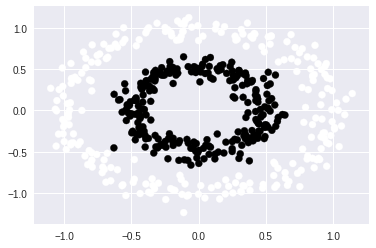

In [0]:
# Use pandas to read the CSV file as a dataframe
df = pd.read_csv("circles500.csv")

# The y values are those labelled 'Class': extract their values
y = df['Class'].values

# The x values are all other columns
del df['Class']    # drop the 'Class' column from the dataframe
X = df.as_matrix() # convert the remaining columns to a numpy array
plt.scatter(X[:,0], X[:,1], c=y)                                                               

In [0]:
df

,X0,X1
0,0.180647,0.552945
1,-0.188674,0.325629
2,0.413742,0.931251
3,-0.199223,0.902665
4,0.488279,-0.341202
5,0.470427,-0.062058
6,-0.008015,0.509012
7,0.750316,0.698184
8,1.062641,-0.188767
9,-0.601391,0.763660


TRAIN-TEST SPLIT:

The dataset is split into training and test data set as features, target , test_features, test_targets respectively.

In [0]:
test_X=X[-50:]  #The data is split into test data and train data                 
test_y=y[-50:]
data_X=X[:-50]  
data_y=y[:-50]


features,targets= data_X, data_y     #The datasets are names as features and class as targets.
test_features, test_targets = test_X,test_y  #Test features and test targets are named subsequently



The training dataset features and targets are futher split into train and validation. The validation features and targets avoids over fitting of the data.

In [0]:
train_features, train_targets = features[:-54], targets[:-54]
val_features, val_targets = features[-54:], targets[-54:]  #The dataset is split into three test,train and validation.This will prevent overfitting of data

**ALGORITHM FOR NEURAL NETWORK**



1.   Data is split into training set and testing set.
2.   The following variables are hardcoded : Learning_rate, Hidden_node, Iterations,            Input_nodes. 
3.  Weights to al, random numbers. Repeat until the maximum of iterarions and send to feed forward network.
4.  *FEED FORWARD NETWORK*: 


*   The product of weight and input is passed as argument to sigmoid function.
*   The sigmoid function classifies the dataset into binary classification. (0 or 1)
*   The result is computed and passed to backpropogation function.


5. *BACKPROPOGATION*:
  

*   Error is checked and error term at every phase is determined.
*   Weights from the output layer is computed and is backpropagated. They are called as weight adjustment layer.
*   Weight is adjusted until the error predictions on the training data is minimized.


6. After the iterations, the minimized values are updated.

In [0]:
class NeuralNetwork(object):    #Neural Network class is created 
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):   
      #Here we pass the arguments : input nodes, hidden nodes,output nodes,learning rate.
        self.input_nodes = input_nodes        
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
                                                                                     
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5, # here parameter is 0.05 
                                       (self.input_nodes, self.hidden_nodes))        #weight matrix between input and hidden

        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))       # weight matrix between hidden to output
        self.learning_rate = learning_rate
        
        self.sigmoid = lambda x : 1/(1 + np.exp(-x))                                  #sigmoid function is used for non-linearity in model also called as activation function 
                                                                                     
        
                    

    def train(self, features, targets):                                              
        new_df = features.shape[0]                                                   #size of features
        weights_input_hidden = np.zeros(self.weights_input_to_hidden.shape)          
        weights_hidden_output = np.zeros(self.weights_hidden_to_output.shape)
        for X, y in zip(features, targets):
            
            result, hidden_outputs = self.forward_pass_train(X)                      #firstly it is sent to feed forward network and compute outputs
            weights_input_hidden, weights_hidden_output = self.backpropagation(result, hidden_outputs, X, y, 
                                                                        weights_input_hidden, weights_hidden_output) #outputs and values are sent to backpropagation
        self.update_weights(weights_input_hidden, weights_hidden_output, new_df)  #Weight is updated


    def forward_pass_train(self, X):                                                
        hidden_inputs = np.dot(X, self.weights_input_to_hidden)                   #weights and X multiplied
        hidden_outputs = self.sigmoid(hidden_inputs)                              #input is sent to sigmoid for linearity

        result_in = np.dot(hidden_outputs, self.weights_hidden_to_output)         #the weight and output is multiplied 
        result = result_in                                                        #the result will be sent as argument to back-propogation
        
        return result_in, hidden_outputs

    def backpropagation(self, result, hidden_outputs, X, y, weights_input_hidden, weights_hidden_output):   
        error = y - result                                                        #error checking 
        
        hidden_error = np.dot(self.weights_hidden_to_output, error)               #error and weight is multiplied
        
        output_error_term = error                                           
        
        hidden_error_term = hidden_error * hidden_outputs * (1 - hidden_outputs)  #formula to compute the error
        
        weights_input_hidden += hidden_error_term * X[:,None]                      #hidden layer weight adjustment
        weights_hidden_output += output_error_term * hidden_outputs[:,None]        #output layer weight adjustment
        return weights_input_hidden, weights_hidden_output                         #backpropogated from output layer

    def update_weights(self, weights_input_hidden, weights_hidden_output, new_df):         
        self.weights_hidden_to_output += self.learning_rate*weights_hidden_output/new_df   #weights are updated accordingly
        self.weights_input_to_hidden += self.learning_rate*weights_input_hidden/new_df 
 
    def run(self, features):                                                             
        
        hidden_inputs =  np.dot(features, self.weights_input_to_hidden)                #input and weights are multiplied
        hidden_outputs = self.sigmoid(hidden_inputs)                                   #sent to activation function
        result_in = np.dot(hidden_outputs, self.weights_hidden_to_output)              #output of previous function is multiplied with weight- hidden_to_output
        result = result_in                                                             
        
        return result
          

In [0]:
input_nodes = train_features.shape[1]                                             
iterations = 1000  #large iterations for better fitting
learning_rate = 0.01
hidden_nodes = 1    #one hidden layer
output_nodes = 2

DISCUSSION:

Network is  an object that has all the variables. It is used to train the dataset and the variables are updated.


In [0]:

import sys                                                                          

input_nodes = train_features.shape[1]    #input nodes 
network = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
for i in range(iterations):
    X, y = train_features, train_targets          
    network.train(X, y)                #Training the datasets

    sys.stdout.flush()


ACCURACY FOR SMALL-DATASET:

Accuracy for the algorithm is determined by calculated the predicted output. The test_features sent to run function to determine the predictions. 
Later, it is compared with the test_targets. If the values are equal then the accuracy is incremented.The accuracy percentage is calculated.



In [0]:
def accuracy(features,targets):                                                    
  accuracy=0
  for data,target in zip(features,targets):
    predictions1= network.run(data)             #executing the neural network
    prob_class1=max(predictions1)               
    ix=np.where(np.isin(predictions1,prob_class1))
    predicted_output=str(np.array(ix)).lstrip('[').rstrip(']') 
    if(predicted_output==str(target)):          #if predicted is equal to target then increment accuracy
        accuracy+=1
  test_acc=(accuracy/len(test_features))*100     #calculate total accuracy percentage
  print("Accuracy for smalldataset ",test_acc)
  
accuracy(test_features,test_targets)

 


Accuracy for smalldataset  46.0


Observation:

The accuracy of the dataset is less because there is only one hidden layer used. Accuracy would be high if there was more than one hidden layer. We could increase the number of iterations to train the dataset and reduce the learning rate for better accuracy.

In [0]:
#Task 3

from google.colab import drive     #mount drive to load the folder
drive.mount('/content/drive')
file='drive/My Drive/Colab Notebooks/cifar-10-batches-py/data_batch_1'  #file path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


INTRODUCTION:

CIFAR 10 Dataset contains a set of images that are commonly used to train machine learning and computer vision algorithms.The dataset is loaded and it has two columns data and labels. The dataset given to us is frog and bird. The visualisation for our dataset is generated below.




In [0]:
#Load CIFAR Dataset
# This function taken from the CIFAR website                                     

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Loaded in this way, each of the batch files contains a dictionary with the following elements:
#   data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. 
#           The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. 
#           The image is stored in row-major order, so that the first 32 entries of the array are the red channel values 
#           of the first row of the image.
#   labels -- a list of 10000 numbers in the range 0-9. 
#             The number at index i indicates the label of the ith image in the array data.

def loadbatch(batchname):                                  
    folder = 'drive/My Drive/Colab Notebooks/cifar-10-batches-py'  #To check the data in the file_batch
    batch = unpickle(folder+"/"+batchname)
    return batch
  
def loadlabelnames():
    folder = 'drive/My Drive/Colab Notebooks/cifar-10-batches-py'   #To identify the data and label
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']
  
batch1 = loadbatch('data_batch_1')                                 #Loading batch1 dataset
print("Number of items in the batch is", len(batch1))              #Determining the length of data

names=loadlabelnames()
data = batch1[b'data']                                             #Assigning data 
labels = batch1[b'labels']                                         #Assigning labels
#To determine the data sets bird and frog
print(names)
print(names[2])     #To extract only the two data
print(names[6])

Number of items in the batch is 4
[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']
b'bird'
b'frog'


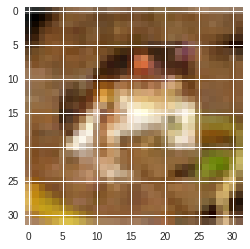

Image 0 : Class is  b'frog'


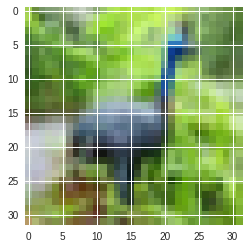

Image 6 : Class is  b'bird'


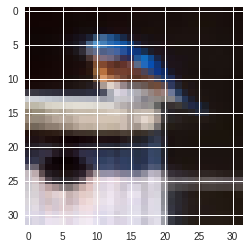

Image 13 : Class is  b'bird'


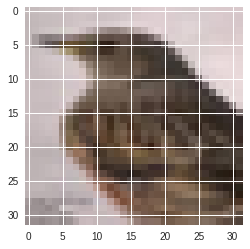

Image 18 : Class is  b'bird'


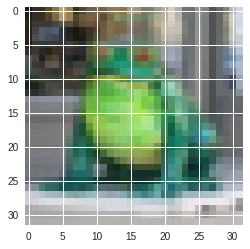

Image 19 : Class is  b'frog'


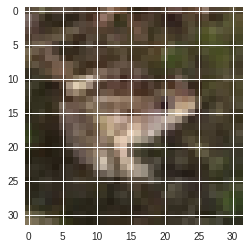

Image 22 : Class is  b'frog'


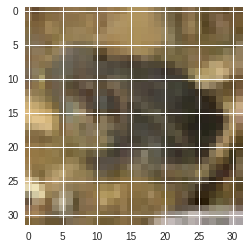

Image 23 : Class is  b'frog'


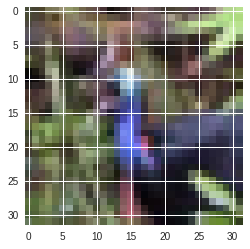

Image 24 : Class is  b'bird'


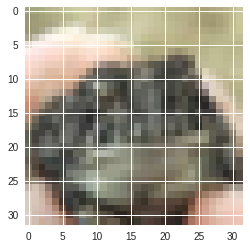

Image 25 : Class is  b'frog'


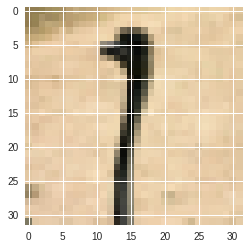

Image 41 : Class is  b'bird'


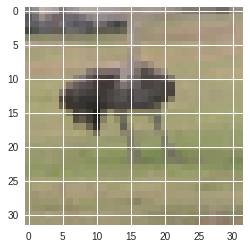

Image 42 : Class is  b'bird'


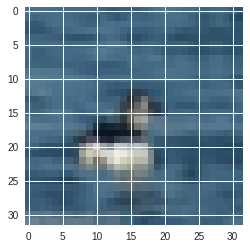

Image 47 : Class is  b'bird'


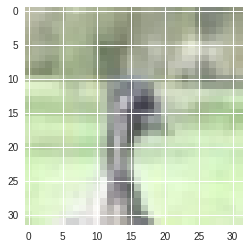

Image 48 : Class is  b'bird'


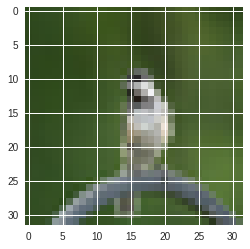

Image 54 : Class is  b'bird'


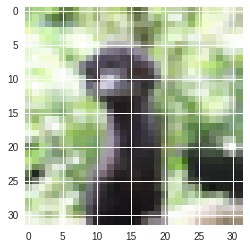

Image 55 : Class is  b'bird'


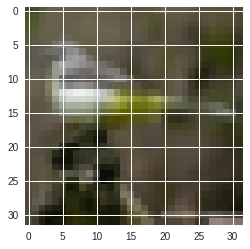

Image 57 : Class is  b'bird'


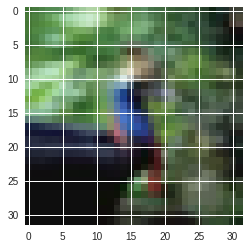

Image 63 : Class is  b'bird'


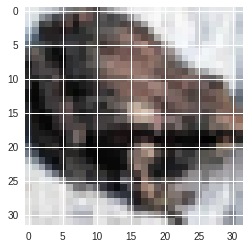

Image 72 : Class is  b'frog'


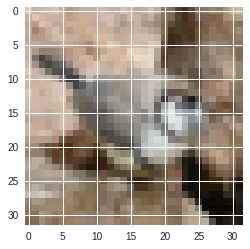

Image 90 : Class is  b'bird'


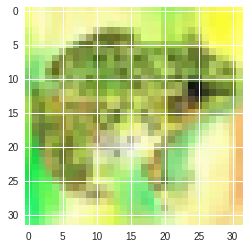

Image 95 : Class is  b'frog'


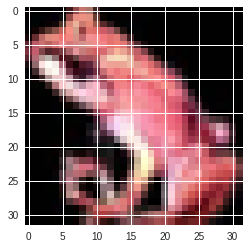

Image 103 : Class is  b'frog'


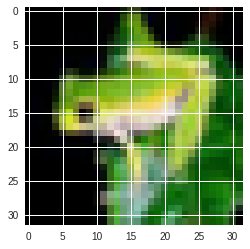

Image 104 : Class is  b'frog'


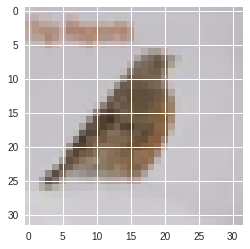

Image 108 : Class is  b'bird'


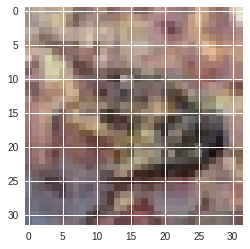

Image 117 : Class is  b'frog'


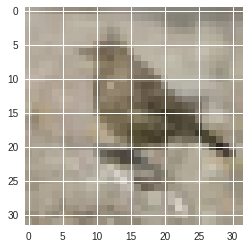

Image 120 : Class is  b'bird'


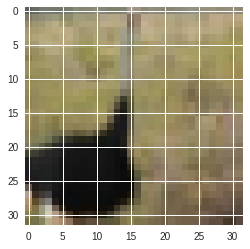

Image 121 : Class is  b'bird'


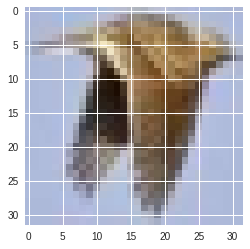

Image 123 : Class is  b'bird'


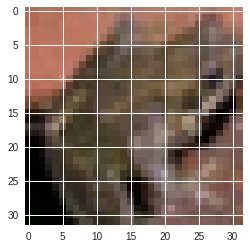

Image 124 : Class is  b'frog'


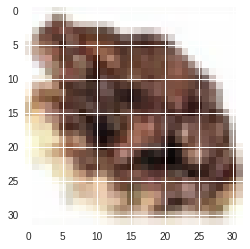

Image 125 : Class is  b'frog'


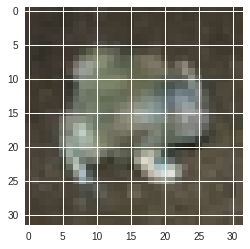

Image 132 : Class is  b'frog'


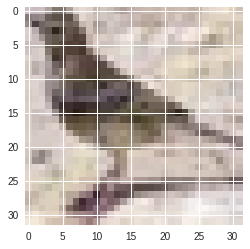

Image 138 : Class is  b'bird'


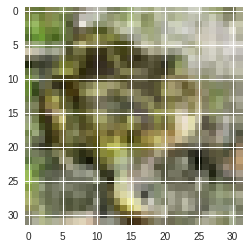

Image 143 : Class is  b'frog'


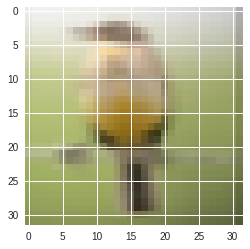

Image 144 : Class is  b'bird'


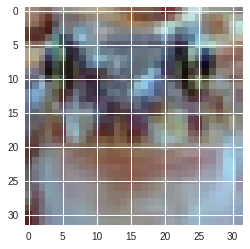

Image 151 : Class is  b'frog'


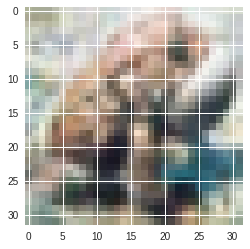

Image 154 : Class is  b'frog'


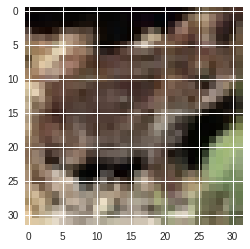

Image 164 : Class is  b'frog'


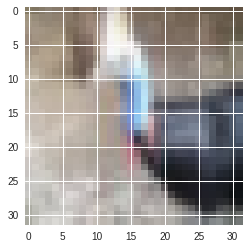

Image 171 : Class is  b'bird'


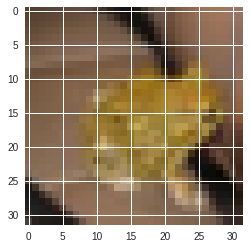

Image 187 : Class is  b'frog'


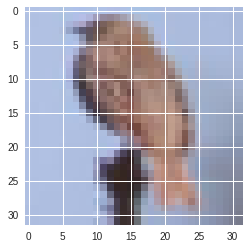

Image 194 : Class is  b'bird'


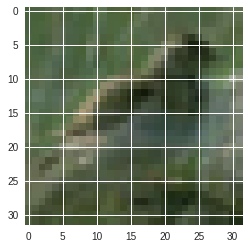

Image 196 : Class is  b'bird'


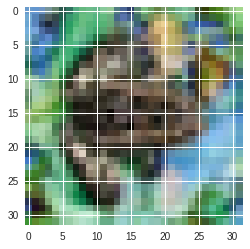

Image 200 : Class is  b'frog'


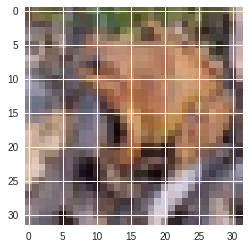

Image 204 : Class is  b'frog'


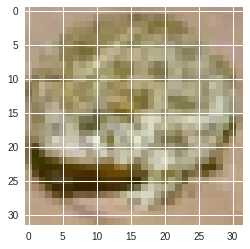

Image 209 : Class is  b'frog'


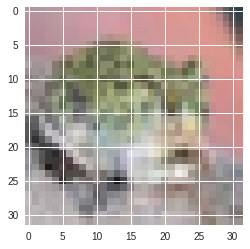

Image 210 : Class is  b'frog'


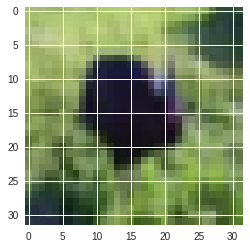

Image 218 : Class is  b'bird'


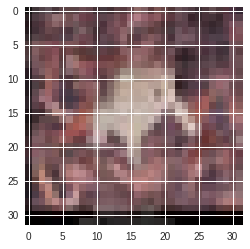

Image 224 : Class is  b'frog'


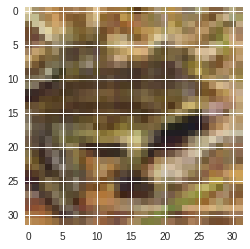

Image 228 : Class is  b'frog'


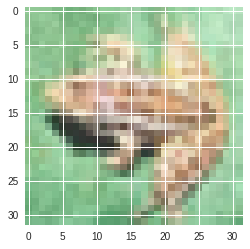

Image 231 : Class is  b'frog'


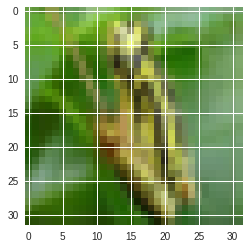

Image 232 : Class is  b'frog'


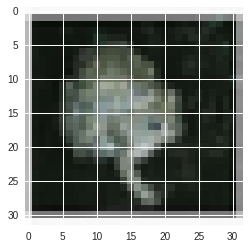

Image 234 : Class is  b'frog'


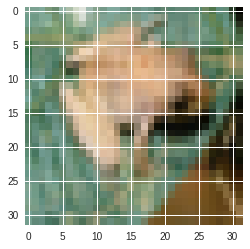

Image 235 : Class is  b'frog'


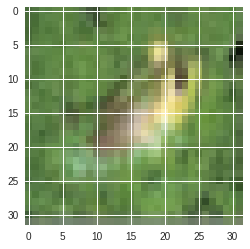

Image 242 : Class is  b'frog'


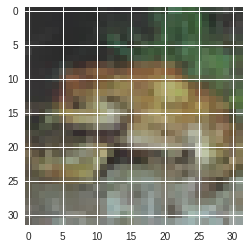

Image 243 : Class is  b'frog'


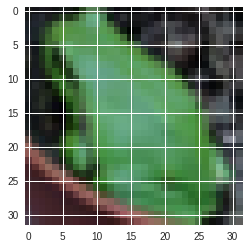

Image 245 : Class is  b'frog'


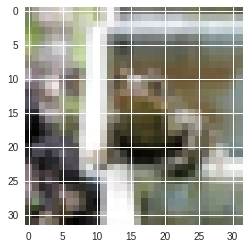

Image 248 : Class is  b'frog'


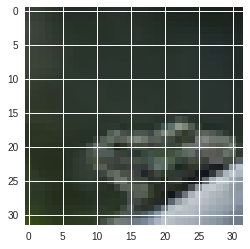

Image 249 : Class is  b'frog'


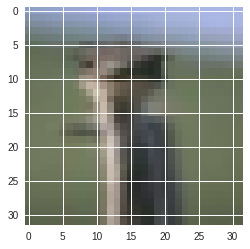

Image 271 : Class is  b'bird'


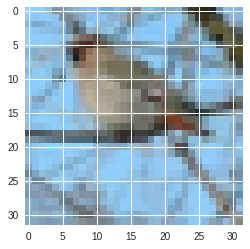

Image 281 : Class is  b'bird'


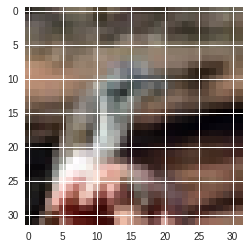

Image 283 : Class is  b'bird'


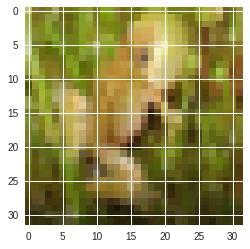

Image 286 : Class is  b'frog'


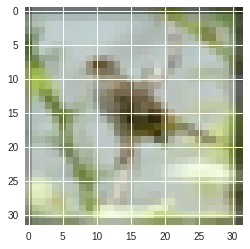

Image 288 : Class is  b'bird'


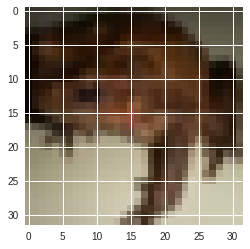

Image 292 : Class is  b'frog'


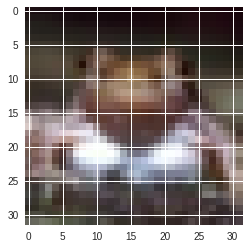

Image 298 : Class is  b'frog'


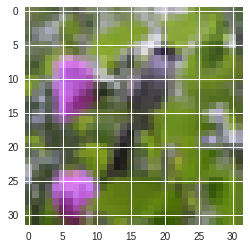

Image 300 : Class is  b'bird'


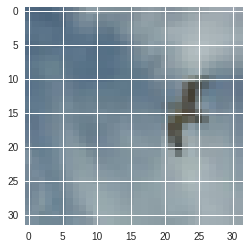

Image 303 : Class is  b'bird'


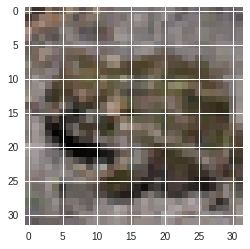

Image 313 : Class is  b'frog'


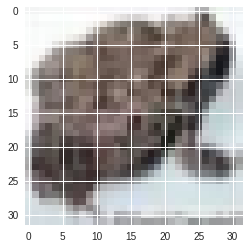

Image 326 : Class is  b'frog'


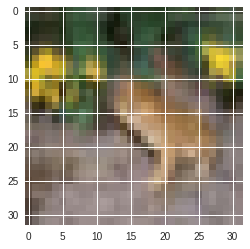

Image 327 : Class is  b'frog'


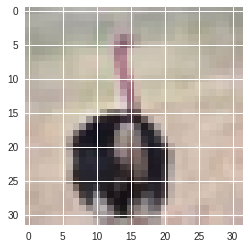

Image 335 : Class is  b'bird'


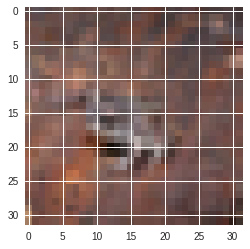

Image 347 : Class is  b'frog'


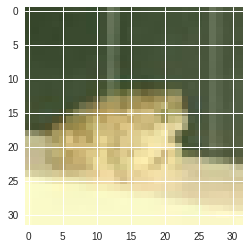

Image 350 : Class is  b'frog'


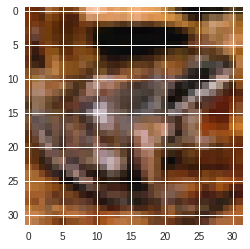

Image 351 : Class is  b'frog'


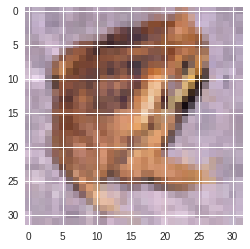

Image 355 : Class is  b'frog'


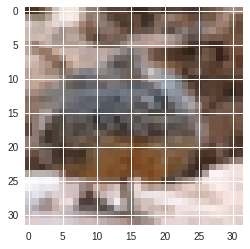

Image 356 : Class is  b'bird'


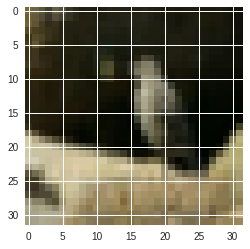

Image 358 : Class is  b'bird'


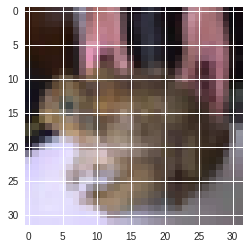

Image 361 : Class is  b'frog'


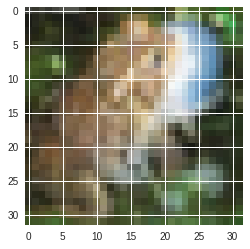

Image 368 : Class is  b'frog'


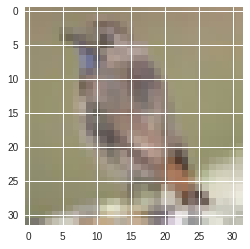

Image 383 : Class is  b'bird'


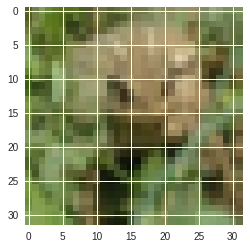

Image 387 : Class is  b'frog'


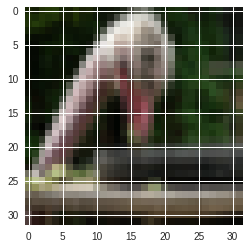

Image 400 : Class is  b'bird'


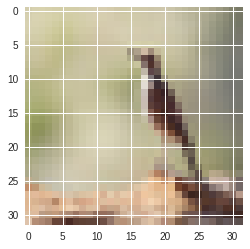

Image 402 : Class is  b'bird'


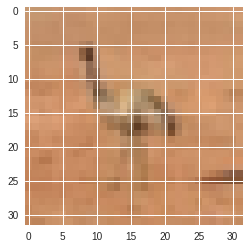

Image 403 : Class is  b'bird'


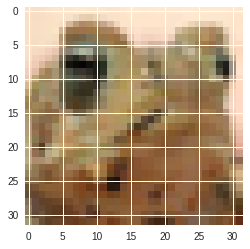

Image 409 : Class is  b'frog'


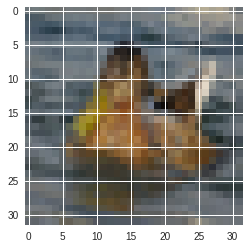

Image 411 : Class is  b'bird'


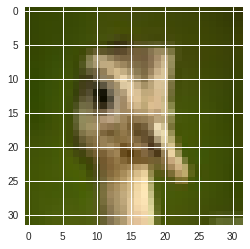

Image 421 : Class is  b'bird'


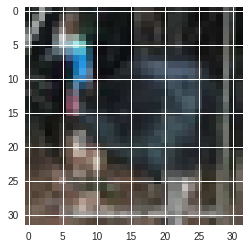

Image 423 : Class is  b'bird'


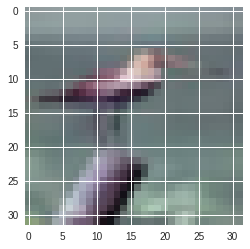

Image 425 : Class is  b'bird'


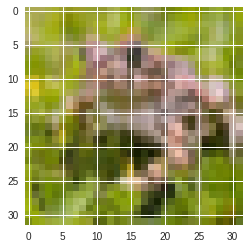

Image 437 : Class is  b'frog'


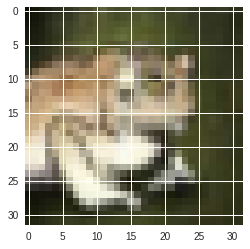

Image 451 : Class is  b'frog'


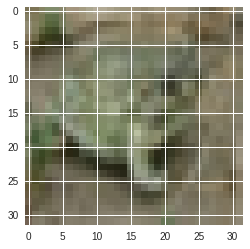

Image 452 : Class is  b'frog'


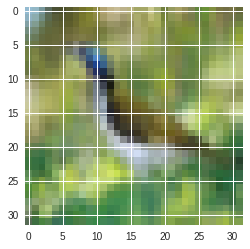

Image 463 : Class is  b'bird'


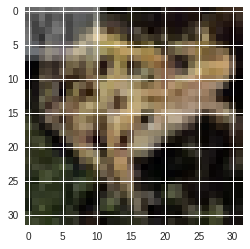

Image 464 : Class is  b'frog'


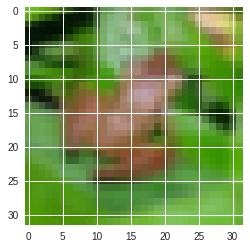

Image 473 : Class is  b'frog'


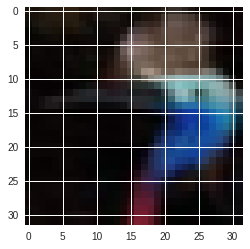

Image 474 : Class is  b'bird'


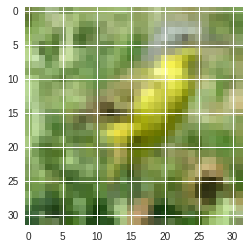

Image 483 : Class is  b'bird'


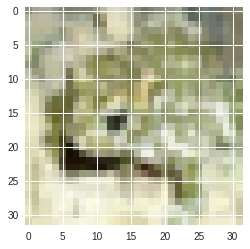

Image 488 : Class is  b'frog'


In [0]:
import matplotlib.pyplot as plt                                                      

def visualise(data, index):
    # MM Jan 2019: Given a CIFAR data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (32x32).

    picture = data[index]
    # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 3x32x32 pixels
    # Note: after reshaping like this, you could select one colour channel or average them.
    picture.shape = (3,32,32) 
    
    # Plot.imshow requires the RGB to be the third dimension, not the first, so need to rearrange
    picture = picture.transpose([1, 2, 0])
    plt.imshow(picture)
    plt.show()
    
#Visualise Data    
for i in range (0,500):
  
  if(names[labels[i]]== b'bird'):
    visualise(data, i)                                #To print the image of the given data
    print("Image", i,": Class is ", names[labels[i]])
  elif(names[labels[i]]== b'frog'):         
    visualise(data, i)                                #To print the image of the given data
    print("Image", i,": Class is ", names[labels[i]])


In [0]:
                                                                             
extracted_data=[]        #To extract only the given data
for i in labels:
  if(labels[i]==2):
    extracted_data.append(data[i])
  elif(labels[i]==6):
    extracted_data.append(data[i])   
extracted_data

[array([164, 105, 118, ...,  29,  26,  44], dtype=uint8),
 array([164, 105, 118, ...,  29,  26,  44], dtype=uint8),
 array([164, 105, 118, ...,  29,  26,  44], dtype=uint8),
 array([164, 105, 118, ...,  29,  26,  44], dtype=uint8),
 array([164, 105, 118, ...,  29,  26,  44], dtype=uint8),
 array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8),
 array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8),
 array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8),
 array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8),
 array([164, 105, 118, ...,  29,  26,  44], dtype=uint8),
 array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8),
 array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8),
 array([164, 105, 118, ...,  29,  26,  44], dtype=uint8),
 array([164, 105, 118, ...,  29,  26,  44], dtype=uint8),
 array([164, 105, 118, ...,  29,  26,  44], dtype=uint8),
 array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8),
 array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8),
 array([164, 1

DISCUSSION:

We have extracted the data that has only Frog and Bird in variable extracted_data. It is necessary to convert the data into array and flatten the dataset. The flattened dataset will be passed as an argument to the neural network.

In [0]:
                                                                                   
extracted_data=np.array(extracted_data)  #into array
data_flat = extracted_data.reshape([-1, 3, 32,32]) #shape the data into 32*32
data_flat = data_flat.transpose([0,2,3,1])     #transpose matrix 
data_flat = data_flat.mean(axis=3)
data= data_flat.reshape([2035,32*32]) #flat size and 32*32


data

array([[151.33333333, 102.        , 122.33333333, ...,  85.66666667,
         83.33333333, 112.        ],
       [151.33333333, 102.        , 122.33333333, ...,  85.66666667,
         83.33333333, 112.        ],
       [151.33333333, 102.        , 122.33333333, ...,  85.66666667,
         83.33333333, 112.        ],
       ...,
       [ 61.33333333,  44.66666667,  47.        , ..., 180.        ,
        117.66666667,  95.66666667],
       [ 61.33333333,  44.66666667,  47.        , ..., 180.        ,
        117.66666667,  95.66666667],
       [151.33333333, 102.        , 122.33333333, ...,  85.66666667,
         83.33333333, 112.        ]])

DISCUSSION:

The dataset is split into train and test using sklean. The training and test data are generated randomly.

In [0]:
                                                                                                 
labels=labels[:2035]      #considering only 2035 labels because extracted data size is 2035                      

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.15, random_state=42) #random split of data and labels


DISCUSSION:

The variables input_nodes, iterations,learning_rate, hidden_nodes are hardcoded. 

In [0]:

                                                                                      

input_nodes1 = data_train.shape[1]   #size of extracted data
iterations1 = 6000                  #total number of iterations
learning_rate1 = 0.001               #learning rate
hidden_nodes1 = 1                    
output_nodes1 = 2


DISCUSSION:

Training dataset is passed to neural network and is stored in neural_image. The neural image is trained for 6000 iterations and their training loss is reduced.

In [0]:
                                                                                   
import sys
input_nodes = data_train.shape[1]
network_image= NeuralNetwork(input_nodes1, hidden_nodes1, output_nodes1, learning_rate1)

for ii in range(iterations1):
    X, y = data_train, labels_train
    network_image.train(X, y)
    sys.stdout.flush()

ACCURACY FOR BIG-DATASET

Accuracy of the image dataset is determined by passing test datasets as arguments.Accuracy for the algorithm is determined by calculated the predicted output. The test_features sent to run function to determine the predictions. 
Later, it is compared with the test_targets. If the values are equal then the accuracy is incremented.The accuracy percentage is calculated.


In [0]:
def accuracy1(features,targets):             #Accuracy function                      
  accuracy=0
  for data,target in zip(features,targets):  #zip both data and labels
    predictions1= network_image.run(data)    #execute the neural network
    prob_class1=max(predictions1)
    ix=np.where(np.isin(predictions1,prob_class1))
    predicted_output=str(np.array(ix)).lstrip('[').rstrip(']')
    if(predicted_output==str(target)):                    #if the label matches the predicted output then increment the accuracy
        accuracy+=1                                     
  test_acc=(accuracy/len(test_features))*100              #percentage of accuracy
  print("Accuracy of bigdataset is",test_acc)

In [0]:
accuracy1(data_test,labels_test)

Accuracy of bigdataset is 48.0


OBSERVATION

The accuracy for the bigdata set is higher than the small dataset, it has better accuracy due to  the number of iterations and the learning rate. The learning rate is very small due to which it has better accuracy but the time taken to train the dataset were high.



**Enhancement - Increasing the hidden node**


1.Increasing the number of hidden layers might improve the accuracy. it also depends on the complexity of the problem.

2.Increasing the number of hidden layers much more than the sufficient number of layers will cause accuracy in the test set. It might overfit the training set, that is, it will learn the training data, but it won't be able to generalize to new unseen data. 



In [0]:

#Enhancement - Increasing the hidden node                                             
input_nodes1 = data_train.shape[1]   #size of extracted data
iterations1 = 1000                  #total number of iterations
learning_rate1 = 0.01               #learning rate
hidden_nodes1 = 2                                      
output_nodes1 = 2

import sys
input_nodes = data_train.shape[1]
network_image= NeuralNetwork(input_nodes1, hidden_nodes1, output_nodes1, learning_rate1)

for ii in range(iterations1):
    X, y = data_train, labels_train
    network_image.train(X, y)
    sys.stdout.flush()

In [0]:
accuracy1(data_test,labels_test)

Accuracy of bigdataset is 57.99999999999999


The accuracy is better with only 1000 iterations. Since hidden layer has increased the accuracy has improved. This reduces the time consumption for training a dataset.

**Enhancement - Relu function**

Rectified Linear Unit: It allows only positive values to pass through it. The negative values are mapped to zero.
It is used as an activation function by replacing sigmoid function.


In [0]:
class NeuralNetwork_new(object):    #Neural Network class is created 
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):   
      #Here we pass the arguments : input nodes, hidden nodes,output nodes,learning rate.
        self.input_nodes = input_nodes        
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
                                                                                     
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5, 
                                       (self.input_nodes, self.hidden_nodes))       

        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))       
        self.learning_rate = learning_rate
        
        self.relu = lambda x : 1*(x>0)                                  #Enhancement relu function
                                                                                     
        
                    

    def train(self, features, targets):                                            
        new_df = features.shape[0]                                                  
        weights_input_hidden = np.zeros(self.weights_input_to_hidden.shape)          
        weights_hidden_output = np.zeros(self.weights_hidden_to_output.shape)
        for X, y in zip(features, targets):
            
            result, hidden_outputs = self.forward_pass_train(X)                      
            weights_input_hidden, weights_hidden_output = self.backpropagation(result, hidden_outputs, X, y, 
                                                                        weights_input_hidden, weights_hidden_output) 
        self.update_weights(weights_input_hidden, weights_hidden_output, new_df) 


    def forward_pass_train(self, X):                                               
        hidden_inputs = np.dot(X, self.weights_input_to_hidden)                  
        hidden_outputs = self.relu(hidden_inputs)                              

        result_in = np.dot(hidden_outputs, self.weights_hidden_to_output)          
        result = result_in                                                        
        
        return result_in, hidden_outputs

    def backpropagation(self, result, hidden_outputs, X, y, weights_input_hidden, weights_hidden_output):    
        error = y - result                                                        
        
        hidden_error = np.dot(self.weights_hidden_to_output, error)               
        
        output_error_term = error                                           
        
        hidden_error_term = hidden_error * hidden_outputs * (1 - hidden_outputs)  
        
        weights_input_hidden += hidden_error_term * X[:,None]                      
        weights_hidden_output += output_error_term * hidden_outputs[:,None]        
        return weights_input_hidden, weights_hidden_output                         

    def update_weights(self, weights_input_hidden, weights_hidden_output, new_df):         
        self.weights_hidden_to_output += self.learning_rate*weights_hidden_output/new_df   
        self.weights_input_to_hidden += self.learning_rate*weights_input_hidden/new_df 
 
    def run(self, features):                                                             
        
        hidden_inputs =  np.dot(features, self.weights_input_to_hidden)                
        hidden_outputs = self.relu(hidden_inputs)                                   
        result_in = np.dot(hidden_outputs, self.weights_hidden_to_output)              
        result = result_in                                                             
        
        return result
          

In [0]:
input_nodes1 = data_train.shape[1]   #size of extracted data                         
iterations1 = 1000                  #total number of iterations
learning_rate1 = 0.01               #learning rate
hidden_nodes1 = 2                                       
output_nodes1 = 2

import sys
input_nodes = data_train.shape[1]
network_image= NeuralNetwork_new(input_nodes1, hidden_nodes1, output_nodes1, learning_rate1)

for ii in range(iterations1):
    X, y = data_train, labels_train
    network_image.train(X, y)
    sys.stdout.flush()

In [0]:
accuracy1(data_test,labels_test)

Accuracy of bigdataset is 57.99999999999999


The accuracy of the bigdata using Relu function is  50 percent  . The relu function is used as an activation function replacing sigmoid function. The hidden node has been increased to two layers to enhance the accuracy.

**REFERENCES**

[1] https://medium.com/analytics-vidhya/neural-networks-for-digits-recognition-e11d9dff00d5

[2]https://nuigalway.blackboard.com/bbcswebdav/pid-1654937-dt-content-rid-12397921_1/courses/1819-CT5107/CT5107_02_NeuralNets.pdf

[3]http://deeplearning.stanford.edu/wiki/index.php/Neural_Networks

[4]http://deeplearning.stanford.edu/wiki/index.php/Backpropagation_Algorithm

[5]http://deeplearning.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization

[6]https://towardsdatascience.com/neural-networks-from-scratch-easy-vs-hard-b26ddc2e89c7

[7]https://nuigalway.blackboard.com/bbcswebdav/pid-1663978-dt-content-rid-12499443_1/courses/1819-CT5107/CT5107_03_DeepNNs.pdf

[8]https://stackoverflow.com/questions/17510098/deriving-equation-by-weights-and-biases-from-a-neural-network

[9]https://www.geeksforgeeks.org/rand-vs-normal-numpy-random-python/

[10]https://www.quora.com/What-is-the-sequence-to-build-back-propagation-for-neural-network

[11]http://www.cs.virginia.edu/~kc2wc/teaching/NLP16/slides/NN.pdf

[12]https://www.neuraldesigner.com/blog/5_algorithms_to_train_a_neural_network

[13]http://neuralnetworksanddeeplearning.com/chap2.html

[14]https://www.learnopencv.com/understanding-feedforward-neural-networks/

[15]http://neuralnetworksanddeeplearning.com/chap2.html

[16]https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6